### 1109 과제

#### 5.5 연습문제 8번) 선형적으로 분리되는 데이터셋에 LinearSVC를 훈련시켜보세요. 그런 다음 같은 데이터셋에 SVC와 SGDClassifier를 적용해보세요. 거의 비슷한 모델이 만들어지는지 확인해보세요.





In [2]:
#set up
import os
import numpy as np

#일관된 출력을 위한 유사난수 초기화
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

#한글출력
matplotlib.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False


In [3]:
from sklearn import datasets

iris = datasets.load_iris()
X= iris['data'][:,(2,3)]
y= iris['target']

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]  #꽃잎 길이, 꽃잎 너비
y = y[setosa_or_versicolor]

In [4]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)  #LinearSVC
svm_clf = SVC(kernel="linear", C=C)  #SVC
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=1000, tol=1e-3, random_state=42)  #SGDClassifier

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.28475098] [[1.05364854 1.09903804]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77714169 0.72981762]]


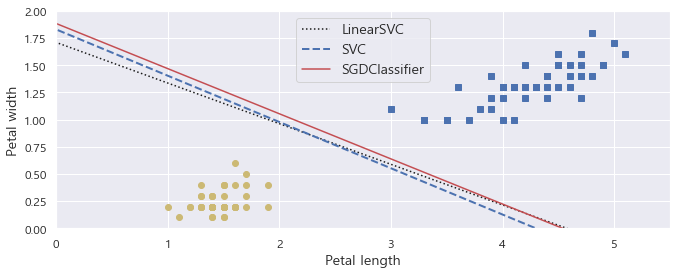

In [6]:
# 각 결정 경계의 기울기와 편향을 계산
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# 결정 경계를 원본 스케일로 변환
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# 세 개의 결정 경계를 모두 그림
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

거의 비슷한 모델이 만들어진다.

#### 6.10 연습문제 2번) 한 노드의 지니 불순도가 보통 그 부모 노드보다 작을까요, 아니면 클까요? 일반적으로 작거나 클까요, 아니면 항상 작거나 클까요? 이유와 함께 서술해주세요.

한 노드의 지니 불순도는 일반적으로 그 부모 노드의 불순도보다 낮다. 이것은 자식의 지니 불순도의 가중치 합이 최소화 되는 방향으로 각 노드를 분할하는 CART 훈련 알고리즘의 비용 함수 때문이다.

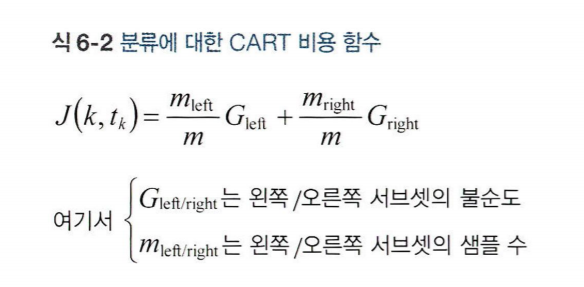

그러나 다른 자식 노드의 지니 불순도 감소량이 어떤 노드의 분순도 증가량보다 큰 경우에는 부모의 불순도보다 큰 노드가 생길 수 있다.

#### 6.10 연습문제 3번 변형) 결정 트리가 훈련 세트에 과대적합되었을 때의 해결방안을 2가지 이상 서술해주세요. (어떤 하이퍼파라미터를 어떻게 조정해야하는지를 서술하시면 됩니다.)

결정 트리가 훈련 세트에 과대 적합되었을 경우 max_depth를 줄이면 모델을 규제하게 되고, 과대적합의 위험이 감소한다. 

max_depth와 같이 결정 트리의 형태를 제한하는 다른 매개변수가 몇개 존재하는데, min_으로 시작하는 매개변수를 증가시키거나 max_로 시작하는 매개변수를 감소시키면 모델에 규제가 커진다. 